In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
import src
print("✅ src package found")

✅ src package found


In [2]:
# STEP 1: Imports
import pandas as pd
# from src.fetch_trials import get_trials
from src.bcd import get_trials
from src.clean_data import clean_trials
from src.score_sites import compute_scores
from src.visualize import plot_top_sites, plot_distribution
from src.database import save_to_sqlite, load_from_sqlite
from src.aggregate_sites import normalize_sites
from src.metrics import compute_match_score, compute_data_quality, compute_performance_metrics

In [3]:
# import importlib
# from src import fetch_trials,bcd
# importlib.reload(fetch_trials)
# importlib.reload(bcd)

In [4]:
# import importlib
# from src import score_sites
# importlib.reload(score_sites)

In [5]:
#  #------------------------------
# # STEP 2: Fetch Data from API
# # ------------------------------
# API_URL = "https://clinicaltrials.gov/api/v2/studies"
# PARAMS = {"query.term": "monkeypox"}  # the actual search query

# # raw_df = get_trials(API_URL, params=PARAMS, record_key="studies")
# raw_df = get_trials("monkeypox",100)

# print(f"✅ Data fetched: {len(raw_df)} rows")
# raw_df.head(10)

In [6]:


raw_df = get_trials("dengue", 60)
print(f"✅ Data fetched: {len(raw_df)} rows")
raw_df.head()


🔍 Response status: 200
🔍 Content-Type: application/json
🔍 First 200 chars: {"studies":[
{"protocolSection":{"identificationModule":{"nctId":"NCT05048875","orgStudyIdInfo":{"id":"CIR 332"},"secondaryIdInfos":[{"id":"156295","type":"OTHER","domain":"FDA IND Number"},{"id":"642
✅ Fetched 60 trials via v2 API
✅ Data fetched: 60 rows


,NCTId,BriefTitle,Condition,EnrollmentCount,StartDate,LastUpdatePostDate,Location,LeadSponsorName,OverallStatus,StudyType
0,NCT05048875,An Evaluation of Repeated Oral Doses of JNJ-64...,Dengue,56,2022-02-03,2025-04-24,None,National Institute of Allergy and Infectious D...,COMPLETED,INTERVENTIONAL
1,NCT01073306,Safety and Immune Response to an Investigation...,Dengue Virus,18,2010-02,2013-01-03,None,National Institute of Allergy and Infectious D...,COMPLETED,INTERVENTIONAL
2,NCT01868399,Pilot Survey of Dengue Fever in Solomon Islands,Arbovirus Infections,2200,2013-03-22,2017-03-07,None,Kaohsiung Medical University Chung-Ho Memorial...,COMPLETED,OBSERVATIONAL
3,NCT06879184,Cohort of the Specialist Network Infectious Di...,Infectious Diseases and Manifestations,15000,2025-03-20,2025-03-17,None,Goethe University,NOT_YET_RECRUITING,OBSERVATIONAL
4,NCT01306084,Viral Infections in Healthy and Immunocompromi...,"Anogenital Herpes, COVID-19, Herpes Labialis",1000,2011-03-15,2025-10-07,None,National Institute of Allergy and Infectious D...,RECRUITING,OBSERVATIONAL


In [7]:
# import pandas as pd
# from pandas import json_normalize

# # Flatten the nested structure
# flat_df = pd.json_normalize(raw_df["protocolSection"])
# flat_df.head()


In [8]:
# print(f"flat_df shape: {flat_df.shape}")
# print(flat_df.columns[:10])  # show first 10 column names

In [9]:
 #------------------------------
# STEP 3: Cleaning
# ------------------------------
clean_df = clean_trials(raw_df)
print(f"Cleaned shape: {clean_df.shape}")
print(clean_df.columns[:10])
clean_df.head(2)



▶️ Initial shape: (60, 10)
▶️ Initial columns sample: ['NCTId', 'BriefTitle', 'Condition', 'EnrollmentCount', 'StartDate']
✅ After dropping all-NaN columns: (60, 10)
✅ After renaming columns: ['NCTId', 'BriefTitle', 'Condition', 'EnrollmentCount', 'StartDate']
✅ Final shape: (60, 10)
Cleaned shape: (60, 10)
Index(['NCTId', 'BriefTitle', 'Condition', 'EnrollmentCount', 'StartDate',
       'LastUpdatePostDate', 'Location', 'LeadSponsorName', 'OverallStatus',
       'StudyType'],
      dtype='object')


,NCTId,BriefTitle,Condition,EnrollmentCount,StartDate,LastUpdatePostDate,Location,LeadSponsorName,OverallStatus,StudyType
0,NCT05048875,An Evaluation of Repeated Oral Doses of JNJ-64...,Dengue,56,2022-02-03,2025-04-24,Unknown,National Institute of Allergy and Infectious D...,COMPLETED,INTERVENTIONAL
1,NCT01073306,Safety and Immune Response to an Investigation...,Dengue Virus,18,2010-02,2013-01-03,Unknown,National Institute of Allergy and Infectious D...,COMPLETED,INTERVENTIONAL


In [10]:
print(clean_df.columns.tolist())


['NCTId', 'BriefTitle', 'Condition', 'EnrollmentCount', 'StartDate', 'LastUpdatePostDate', 'Location', 'LeadSponsorName', 'OverallStatus', 'StudyType']


In [11]:
df_scored = compute_match_score(clean_df)
df_scored = compute_data_quality(df_scored)
df_scored = compute_performance_metrics(df_scored)
df_scored = compute_scores(df_scored)


In [12]:
print(df_scored.columns.tolist())

['NCTId', 'BriefTitle', 'Condition', 'EnrollmentCount', 'StartDate', 'LastUpdatePostDate', 'Location', 'LeadSponsorName', 'OverallStatus', 'StudyType', 'TherapeuticMatch', 'PhaseMatch', 'InterventionMatch', 'RegionMatch', 'MatchScore', 'DataQuality', 'CompletedRatio', 'completeness', 'recency_score', 'enrollment_score', 'completeness_score', 'score', 'score_pct']


In [13]:
df_scored.head(10)

,NCTId,BriefTitle,Condition,EnrollmentCount,StartDate,LastUpdatePostDate,Location,LeadSponsorName,OverallStatus,StudyType,...,RegionMatch,MatchScore,DataQuality,CompletedRatio,completeness,recency_score,enrollment_score,completeness_score,score,score_pct
0,NCT05048875,An Evaluation of Repeated Oral Doses of JNJ-64...,Dengue,56,2022-02-03,2025-04-24,Unknown,National Institute of Allergy and Infectious D...,COMPLETED,INTERVENTIONAL,...,0.341066,0.457253,1.0,0.0,0.0,0.592569,0.406497,0.0,0.299720,61.351244
1,NCT01073306,Safety and Immune Response to an Investigation...,Dengue Virus,18,2010-02,2013-01-03,Unknown,National Institute of Allergy and Infectious D...,COMPLETED,INTERVENTIONAL,...,0.113474,0.636468,0.8,0.0,0.0,0.000003,0.296041,0.0,0.088813,18.178496
2,NCT01868399,Pilot Survey of Dengue Fever in Solomon Islands,Arbovirus Infections,2200,2013-03-22,2017-03-07,Unknown,Kaohsiung Medical University Chung-Ho Memorial...,COMPLETED,OBSERVATIONAL,...,0.924694,0.707084,0.8,0.0,0.0,0.000173,0.773840,0.0,0.232204,47.530708
3,NCT06879184,Cohort of the Specialist Network Infectious Di...,Infectious Diseases and Manifestations,15000,2025-03-20,2025-03-17,Unknown,Goethe University,NOT_YET_RECRUITING,OBSERVATIONAL,...,0.877339,0.508292,1.0,0.0,0.0,0.533980,0.966801,0.0,0.450234,92.161589
4,NCT01306084,Viral Infections in Healthy and Immunocompromi...,"Anogenital Herpes, COVID-19, Herpes Labialis",1000,2011-03-15,2025-10-07,Unknown,National Institute of Allergy and Infectious D...,RECRUITING,OBSERVATIONAL,...,0.257942,0.215770,1.0,0.0,0.0,0.933800,0.694622,0.0,0.488526,100.000000
5,NCT02332733,Evaluating the Safety of and Immune Response t...,Dengue,266,2014-11,2018-12-05,Unknown,National Institute of Allergy and Infectious D...,COMPLETED,INTERVENTIONAL,...,0.659984,0.388355,0.8,0.0,0.0,0.000995,0.561755,0.0,0.168825,34.556990
6,NCT00993447,Immunogenicity and Safety of Sanofi Pasteur's ...,"Dengue, Dengue Hemorrhagic Fever, Dengue Virus...",600,2009-10,2022-03-24,Unknown,"Sanofi Pasteur, a Sanofi Company",COMPLETED,INTERVENTIONAL,...,0.817222,0.378466,0.8,0.0,0.0,0.027026,0.643329,0.0,0.201107,41.165028
7,NCT01084291,Evaluation of the Safety and Immune Response t...,Dengue Virus,18,2010-04,2013-01-03,Unknown,National Institute of Allergy and Infectious D...,COMPLETED,INTERVENTIONAL,...,0.555201,0.790096,0.8,0.0,0.0,0.000003,0.296041,0.0,0.088813,18.178496
8,NCT05218304,Baromètre Santé Adulte 2021-2022,"Diabetes, Hypercholesterolemia, Renal Failure,...",5471,2021-07-26,2022-02-01,Unknown,Agence Sanitaire et Sociale de Nouvelle Calédonie,SUSPENDED,INTERVENTIONAL,...,0.529651,0.362677,0.8,0.0,0.0,0.023502,0.865407,0.0,0.266673,54.586446
9,NCT02193087,Safety and Immunogenicity of Three Formulation...,Dengue Fever,1002,2014-08-06,2019-07-18,Unknown,Takeda,COMPLETED,INTERVENTIONAL,...,0.241852,0.631126,0.8,0.0,0.0,0.001844,0.694822,0.0,0.209000,42.780805


In [14]:
# --------------------------------
# STEP 4: Aggregate by site
# --------------------------------
site_summary = normalize_sites(df_scored)
print(site_summary.head())

ℹ️ Using 'LeadSponsorName' as site identifier (Location all 'Unknown').
✅ Aggregated into 38 unique sites using 'LeadSponsorName'.
                                                 Site  TotalStudies  \
19  National Institute of Allergy and Infectious D...             9   
26                                             Takeda             5   
30  U.S. Army Medical Research and Development Com...             5   
24                   Sanofi Pasteur, a Sanofi Company             4   
8   Foundation for Innovative New Diagnostics, Swi...             3   

    AvgEnrollment   StartDate LastUpdatePostDate  
19     885.888889     2009-01         2025-10-07  
26     399.400000  2014-08-06         2025-09-08  
30     160.600000     2007-07         2021-03-26  
24    5468.250000     2009-10         2024-01-10  
8      411.666667  2020-09-10         2023-11-21  


In [15]:

# # ------------------------------
# # STEP 4: Compute Scores
# # ------------------------------
# scored_df = compute_scores(clean_df, date_col='lastupdatepostdate')
# scored_df[['brieftitle', 'enrollmentcount', 'score_pct']].head()


In [ ]:

save_to_sqlite(site_summary, "../data/clinical_sites.db", table="dengue_sites")

reloaded_sites = load_from_sqlite("../data/clinical_sites.db", table="dengue_sites")
print(f"✅ Reloaded {len(reloaded_sites)} site records from SQLite")


✅ Reloaded 38 site records from SQLite


In [ ]:

# ------------------------------
# STEP 5: Save to SQLite Database
# ------------------------------
save_to_sqlite(df_scored, "../data/clinical_sites.db", table="dengue_trials")

reloaded_df = load_from_sqlite("../data/clinical_sites.db", table="dengue_trials")
print(f"✅ Reloaded {len(reloaded_df)} rows from SQLite")


✅ Reloaded 60 rows from SQLite


In [18]:
# import os
# print(os.getcwd())
# print(os.path.exists("data"))
# print(os.access("data", os.W_OK))
# print(os.path.exists("../data"))

In [19]:

# import importlib
# from src import visualize
# importlib.reload(visualize)
# from src.visualize import plot_top_sites_by_study_count


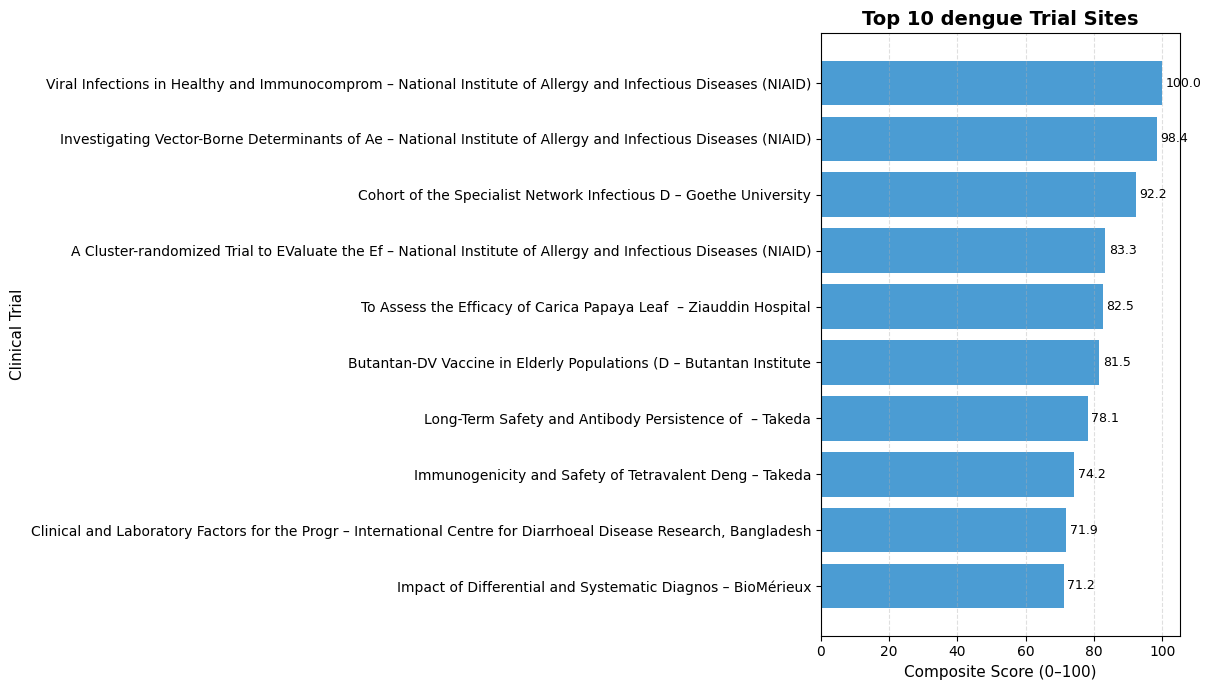

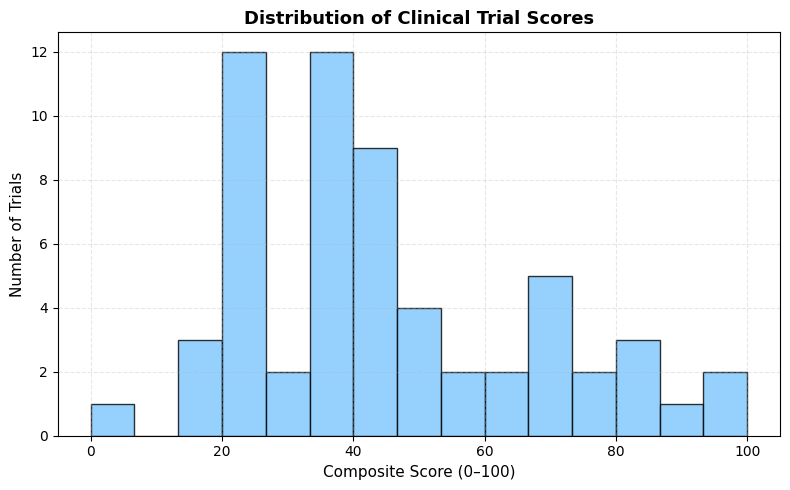

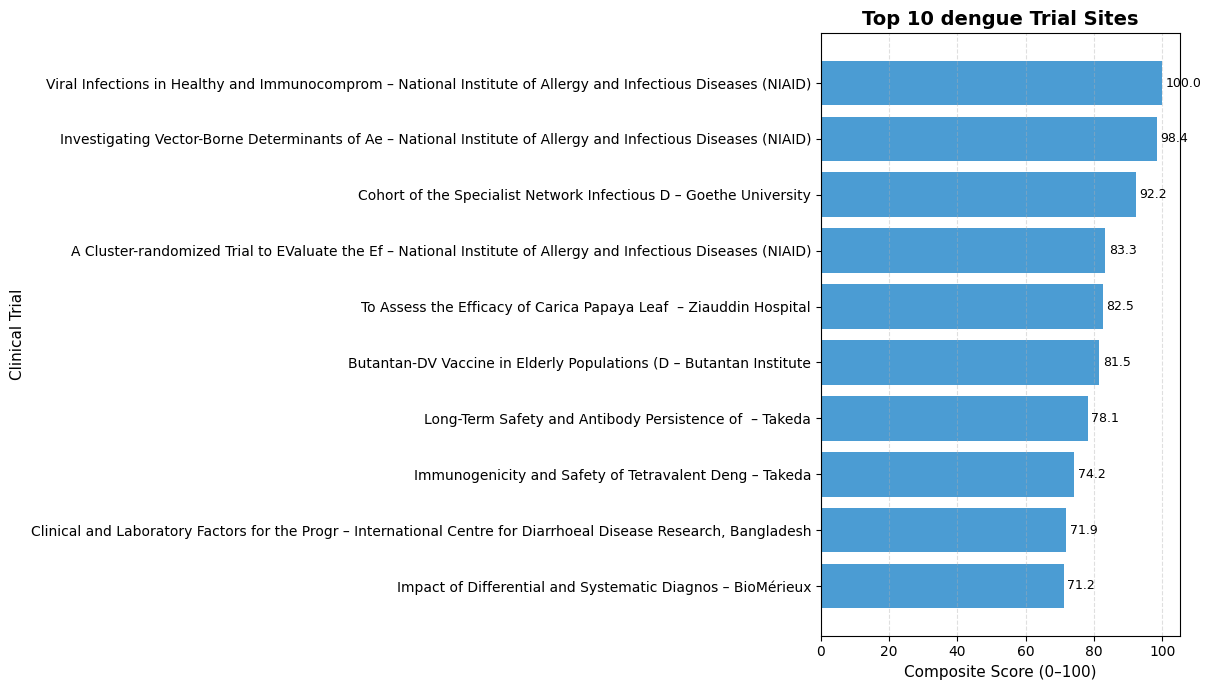

In [21]:

# ------------------------------
# STEP 6: Visualize
# ------------------------------
plot_distribution(df_scored, col='score_pct')
plot_top_sites(df_scored, n=10, title="Top 10 dengue Trial Sites")



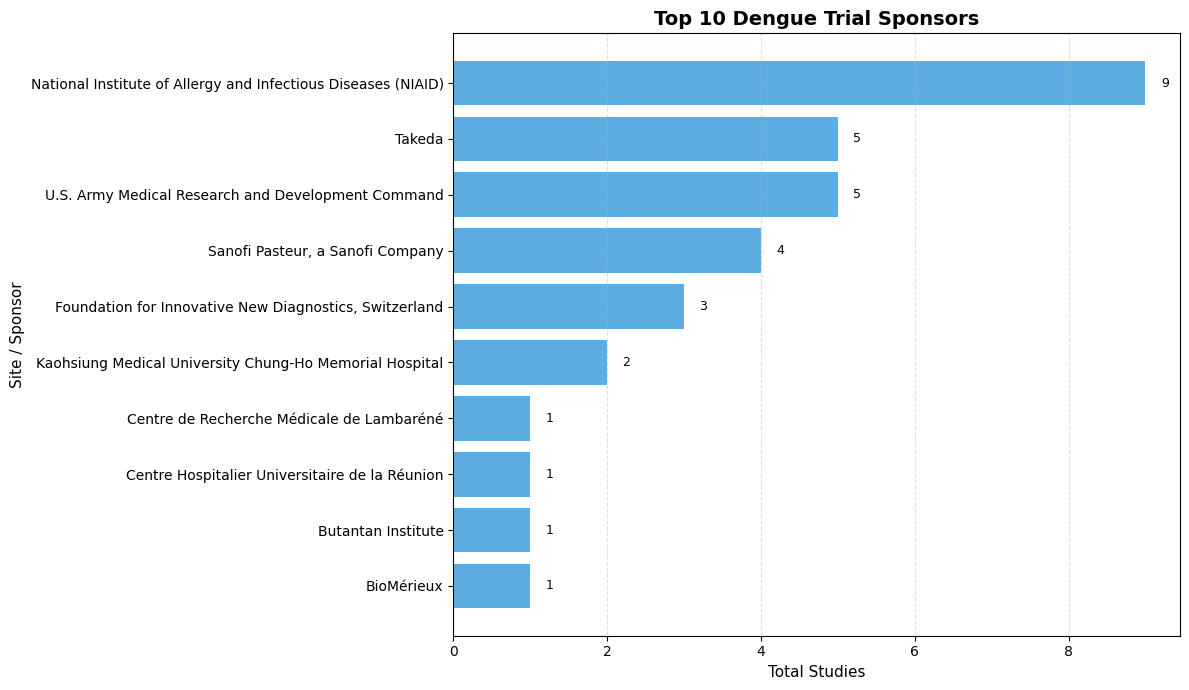

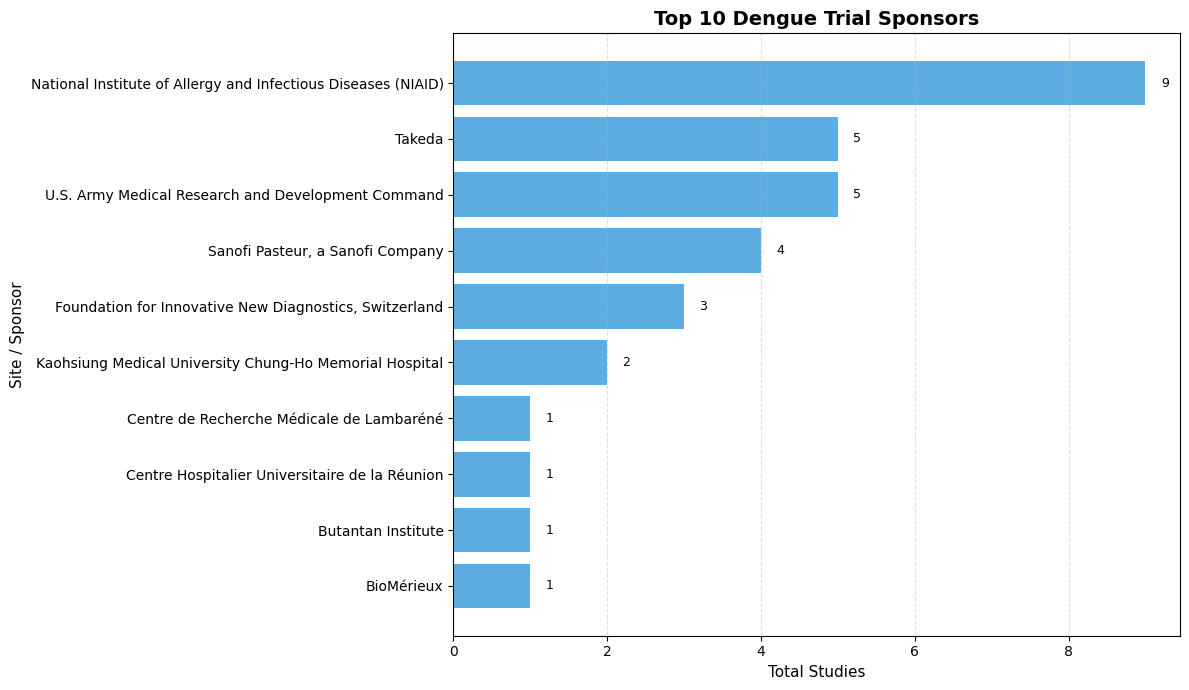

In [22]:
from src.visualize import plot_top_sites_by_study_count

plot_top_sites_by_study_count(site_summary, n=10, title="Top 10 Dengue Trial Sponsors")


In [ ]:

# ------------------------------
# STEP 7: Export to CSV (optional)
# ------------------------------
df_scored.to_csv("../data/dengue_trials_scored.csv", index=False)
print("📁 Exported CSV: ../data/dengue_trials_scored.csv")

In [ ]:
site_summary.to_csv("../data/dengue_site_summary.csv", index=False)
print("📁 Exported CSV: ../data/dengue_site_summary.csv")